In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from operator import*

def sample(times, devi, mean):
    x = np.zeros(times)
    for i in range(times):
        x[i] = mean+np.random.randn()*devi
    return x

def list_mul(_list, fact):
    al_list = _list
    for i in range(len(_list)):
        al_list[i] = _list[i] * fact
    return al_list

def trials(times):
    #parameter
    c=[0.3, 0.5, 0.8]
    
    #sample
    s=sample(times, devi=0.8, mean=1)
    s0=sample(times, devi=1, mean=0)
    
    #intialize counters
    n = 3
    ptp = [0, 0, 0]
    pfp = [0, 0, 0]
    
    #count the responses
    for i in range(times):
        for j in range(n):
            if s0[i] > c[j]:
                pfp[j]+=1
            if s[i] > c[j]:
                ptp[j]+=1
             
    #transform counts into probabilities  
    #cacluate the probit transform
    
    for i in range(n):
        ptp[i] = ptp[i]/times
        pfp[i] = pfp[i]/times
        
    for i in range(n):
        ptp[i] = norm.ppf(ptp[i])
        pfp[i] = norm.ppf(pfp[i])  
        
    x_ = 0
    y_ = 0
    xp2 = 0
    yp2 = 0
    xy_ = 0
    for i in range(n):
        x_ += pfp[i]
        y_ += ptp[i]
        xp2 = xp2+pfp[i]*pfp[i]
        yp2 = yp2+ptp[i]*ptp[i]
        xy_ += pfp[i]*ptp[i]
    
    x_ /= n
    y_ /= n
    lxx = xp2-(x_*x_)*n
    lxy = xy_-(x_*y_)*n
    lyy = yp2-(y_*y_)*n
    
    b=lxy/lxx
    a=y_-b*x_
    
    devi_ = 1/b
    mean_ = a*devi_
    
    #plt.plot(pfp, list_mul(pfp, 1/devi_)+mean_/devi_)
    #plt.plot(pfp, ptp,'ro')
    #plt.show()
    
    return devi_, mean_

In [2]:
def experiment(times):
    deviations = list(range(times))
    means = list(range(times))
    aucs = list(range(times))
    for i in range(times):
        deviations[i],means[i] = trials(50)
        aucs[i] = norm.cdf(means[i]/math.sqrt(1+math.pow(deviations[i],2)))
        
    return deviations ,means, aucs

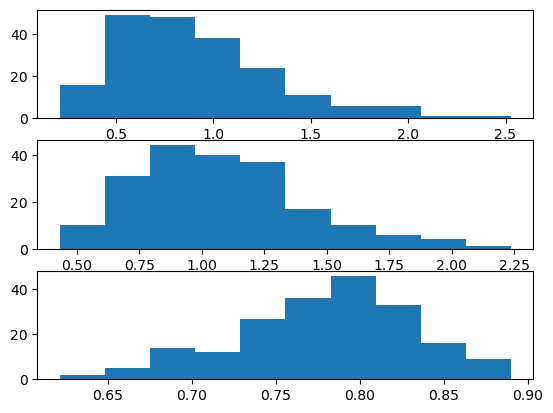

In [3]:
if __name__ == '__main__':
    
    Deviations, Means, Aucs = experiment(200)
    
    plt.subplot(311)
    counts, bins = np.histogram(Deviations)
    plt.hist(bins[:-1], bins, weights=counts)
    
    plt.subplot(312)
    counts, bins = np.histogram(Means)
    plt.hist(bins[:-1], bins, weights=counts)
    
    plt.subplot(313)
    counts, bins = np.histogram(Aucs)
    plt.hist(bins[:-1], bins, weights=counts)
    
    

<generator object <genexpr> at 0x0000025FB0243C60>
